En esta parte del curso discutiremos algoritmos que permiten encontrar las raíces de funciones, esto es los valores para $\mathbf{x}$ que permiten que $f(\mathbf{x})=0$. Esto es especialmente útil para poder encontrar la solución a problemas de ecuaciones no lineales, es decir aquellos en donde la función $f(x)$ no es expresada únicamente de la forma general $a\cdot \mathbf{x} + b$ ($a$ y $b$ son constantes escalares.

En esta sección estaremos interesados en obtener los valores de $x$ que satisfacen relaciones como por ejemplo:
$$x-sin(x)=0 ,$$
o
$$x^4 + 35\cdot x^3 + 20\cdot x^2 + x -3 = 0$$

Evidentemente, muchos problemas como los anteriores no permiten obtener analiticamente las raíces. De ahí que el objetivo es que aprendamos algoritmos numéricos que permitan evaluar las raíces aproximadamente.

# Método Gráfico

Existen muchas maneras ubicar un intervalo $a<x<b$ en donde la curva definida por $f(x)=0$ se intersecta con el eje. A esta coordenada $x$ del punto de la intersección se le denomina raíz de la ecuación $f(x)=0$. Una manera muy simple consiste en graficar la función para un intervalo dado y examinar visualmente en que punto del eje horizontal se produce el corte de la curva.

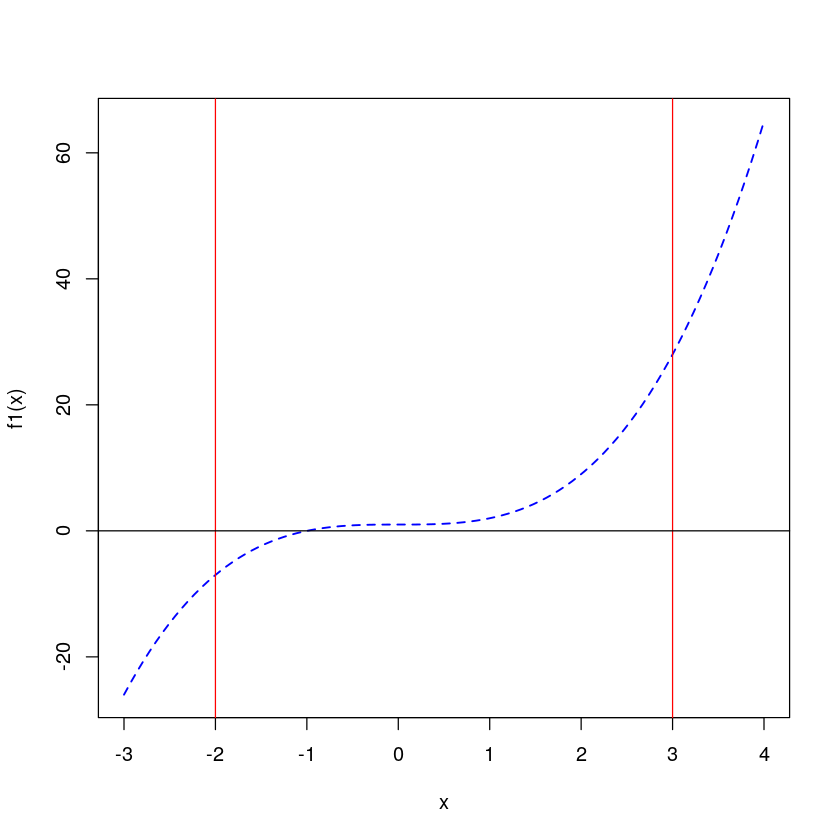

In [8]:
f1 <- function(x){
    return( x^3 + 1)
}
curve(f1, xlim=c(-3,4), col='blue', lwd=1.5, lty=2)
abline(v=-2, col='red')
abline(v=3, col='red')
abline(h=0)

## ¿Como encontrar los valores del intervalo?
Una posibilidad consiste en encontrar dos puntos sobre el eje de _x_, digamos $x=a$ y $x=b$, tales que se cumple la condición $f(a)\cdot f(b)< 0$.

_Por ejemplo:_
Encuentre dos valores para $x$ que cumplen la condición anterior para la función $$f(x)=x\cdot \sin(\pi\cdot x)-\exp(-x)$$

# Método de Newton

Comienza con una aproximación $x_0$ y obtiene una aproximación mejorada $x_1$ mediante la siguiente expresión:

$$x_1=x_0-\frac{f(x_0)}{f'(x_0)}$$

X= 2 	 E= 0.1565176 
X= 2 	 
X= 1.843482 	 E= 0.002076291 
X= 1.843482 	 
X= 1.841406 	 E= 4.05721e-07 
X= 1.841406 	 
X= 1.841406 	 E= 1.530604e-14 
X= 1.841406 	 


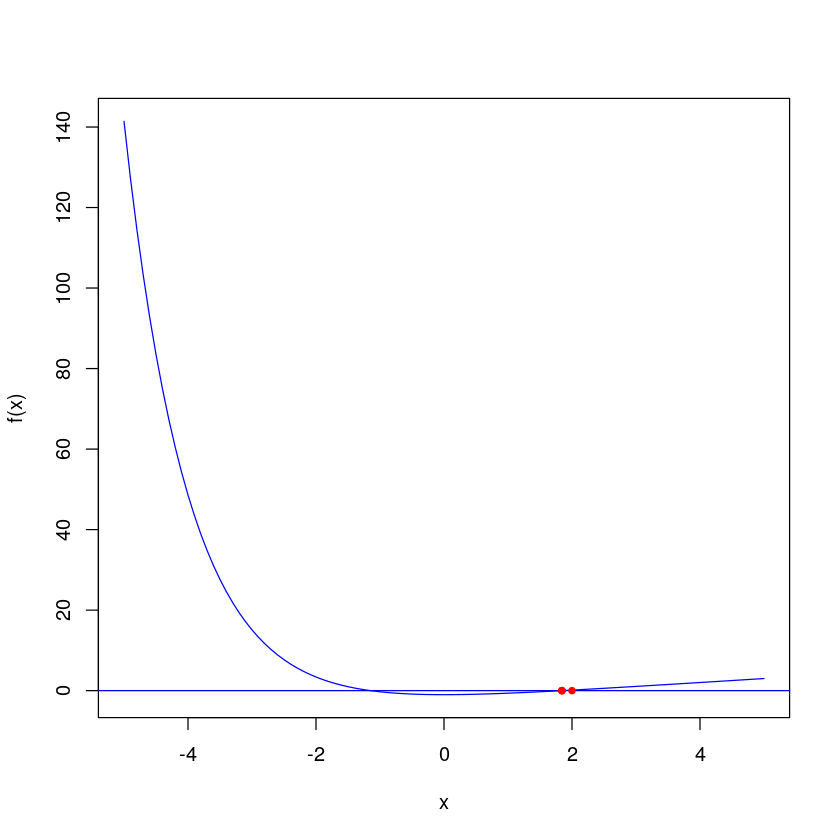

In [7]:
newton_raphson <- function(x0,f,fp, tol=1e-8, NMAX=20) {
    i <- 1
    # se puede eliminar
    x<-seq(-5,5,0.1)
    plot(x, f(x), type="l", col="blue")
    abline(h=0,col="blue")
    ###

    while(i <= NMAX) {
        #x_prev <- x # almacenamos el valor de la iteración anterior
        x1<-x0-f(x0)/fp(x0)
        if (f(x1) == 0 || abs(x0 - x1) < tol) {
            break
        }
        i <- i + 1
        error<-abs(f(x1)/fp(x1))
        cat("X=",x1,"\t","E=",error,"\n")
        x0 <- x1
        # se puede eliminar
        points(rbind(c(x1,0)),pch=19,cex=0.7,col="red")
        cat("X=",x1,"\t","\n")
        ####

    }
}

Fx <- function(x) exp(-x) + x -2
F1x <- function(x) 1-exp(-x) # derivada de la función anterior.

newton_raphson(1, Fx, F1x)

### Raíz cuadrada y uso del método sin derivadas:

A continuación se mostrará como calcular la raíz de $7$ con la implementación anterior del método y una nueva que no requiere de la derivada de la función.

X= 4 	 E= 1.125 
X= 4 	 
X= 2.875 	 E= 0.2201087 
X= 2.875 	 
X= 2.654891 	 E= 0.00912426 
X= 2.654891 	 
X= 2.645767 	 E= 1.573308e-05 
X= 2.645767 	 
X= 2.645751 	 E= 4.677877e-11 
X= 2.645751 	 


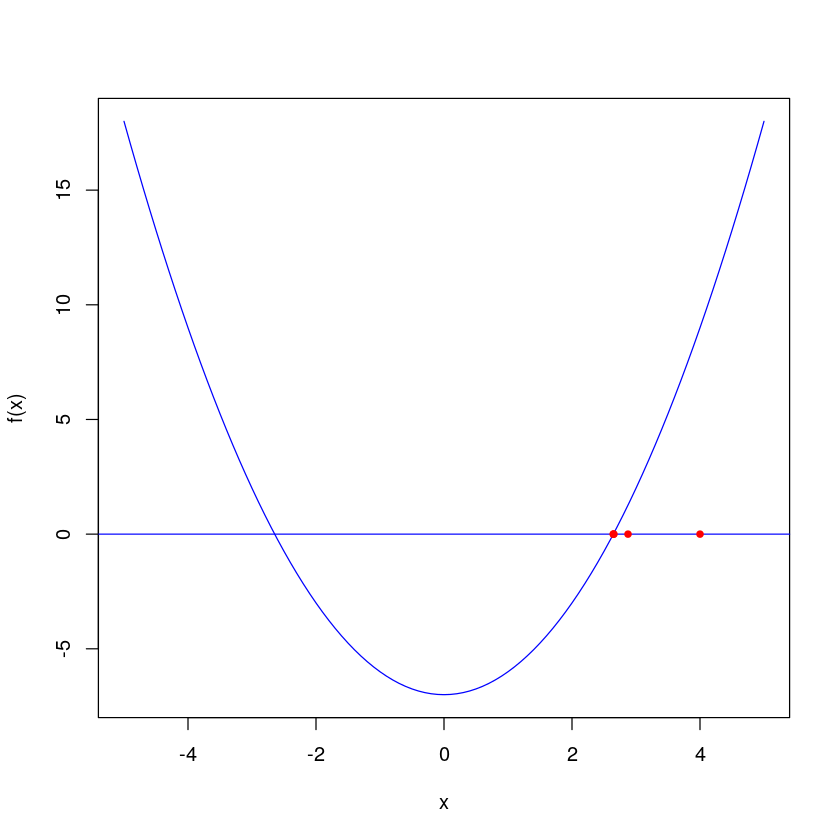

In [15]:
Fx <- function(x) x^2-7
F1x <- function(x) 2*x # derivada de la función anterior.

newton_raphson(1, Fx, F1x)

Newton Raphson sin derivada de la función:

X= 4 	 E= 1.125 
X= 4 	 
X= 2.875 	 E= 0.2201087 
X= 2.875 	 
X= 2.654891 	 E= 0.00912426 
X= 2.654891 	 
X= 2.645767 	 E= 1.573308e-05 
X= 2.645767 	 
X= 2.645751 	 E= 4.677877e-11 
X= 2.645751 	 


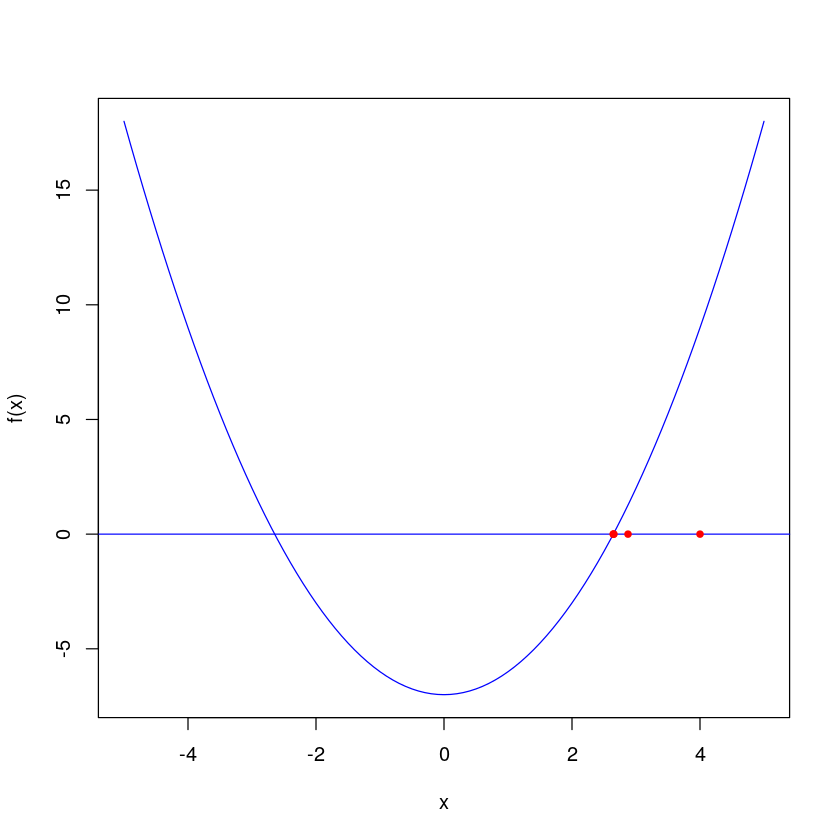

In [17]:
#install.packages("numDeriv")

newton_raphson <- function(x0,f, tol=1e-8, NMAX=20) {
    require("numDeriv")
    i <- 1
    # se puede eliminar
    x<-seq(-5,5,0.1)
    plot(x, f(x), type="l", col="blue")
    abline(h=0,col="blue")
    ###

    while(i <= NMAX) {
        #x_prev <- x # almacenamos el valor de la iteración anterior
        dx <- genD(func = f, x = x0)$D[1]
        x1<-x0-f(x0)/dx
        if (f(x1) == 0 || abs(x0 - x1) < tol) {
            break
        }
        i <- i + 1
        dx <- genD(func = f, x = x1)$D[1]
        error<-abs(f(x1)/dx)
        cat("X=",x1,"\t","E=",error,"\n")
        x0 <- x1
        # se puede eliminar
        points(rbind(c(x1,0)),pch=19,cex=0.7,col="red")
        cat("X=",x1,"\t","\n")
        ####

    }
}

newton_raphson(1, Fx)

__Uso de implementación de librería__ _rootSolve_

Valor inicial de 1 y cota superior de 3.

In [20]:
#install.packages("rootSolve")
library("rootSolve")

uniroot(Fx, c(1,3))

$root
[1] 2.645723

$f.root
[1] -0.0001492891

$iter
[1] 4

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

---

# Método de la secante

El principal problema del método de Newton, radica en que es necesario conocer la expresión de la derivada de la función, cuestión que no siempre es sencilla.

El método de la secante no requiere de la derivada y necesita dos puntos iniciales.

In [5]:
secante <- function(x0,x1, Fx, tol=1.e-4, NMAX=20) {
    x <- (Fx(x1)*x0 - Fx(x0)*x1) / (Fx(x1) - Fx(x0))
    i <-1
    while (i <= NMAX) {
        x0<-x1
        x1<-x
        x<-(Fx(x1)*x0-Fx(x0)*x1)/(Fx(x1)-Fx(x0))
        i <- i + 1
        if(is.na(Fx(x))){
            cat("NA found on x=",x)
        }
        if (abs(Fx(x)) < tol) {
            break
        }
        cat("X=",x,"\t","\n")
    }
}

f <- function(x) exp(-x) + x -2
secante(0,3, f, tol=1e-6)

X= 1.809481 	 
X= 1.842774 	 
X= 1.841401 	 


# Método regula falsi o de la falsa posición

## Ecuación de la recta que pasa por dos puntos
$$y=\frac{y_a - y_b}{x_a-x_b}x+\frac{x_ay_b-x_by_a}{x_a-x_b}$$

__Este método traza una recta entre los dos puntos extremos del intervalo ($x_a$ y $x_b$) y usa la raíz de esta recta como valor de $x$ candidato ($x_c$).__

<img src="http://drive.google.com/uc?export=view&id=1B0IcxpF5Ibbc_fjfXf4rDPnAiCEmaYwM">

Si se quiere encontrar el valor para $x$ en donde la recta pasa por el origen ($y=0$), entonces la expresión anterior queda:

$$-(\frac{y_a - y_b}{x_a-x_b}x)=\frac{x_ay_b-x_by_a}{x_a-x_b}\\
\frac{y_b - y_a}{x_a-x_b}x=\frac{x_ay_b-x_by_a}{x_a-x_b}\\
(y_b - y_a)x=(x_ay_b-x_by_a)\\
x=\frac{x_ay_b-x_by_a}{y_b - y_a}=x_a-\frac{(x_b-x_a)y_a}{y_b-y_a}
$$

Alternativamente:
$$\frac{y_a - y_b}{x_a-x_b}x=-(\frac{x_ay_b-x_by_a}{x_a-x_b})\\
\frac{y_a - y_b}{x_a-x_b}x=\frac{x_by_a-x_ay_b}{x_a-x_b}\\
(y_a - y_b)x=(x_by_a-x_ay_b)\\
x=\frac{x_by_a-x_ay_b}{y_a - y_b}=x_b-\frac{(x_a-x_b)y_b}{y_a - y_b}
$$

Comenzamos con un intervalo $[a,b]$ para $x$ y suponemos que la función $f(x)$ cambia de signo _solamente una vez_.

In [13]:
regula <- function(a,b, Fx, tol=1e-8, NMAX=20) {
    # se puede eliminar
    x<-seq(a,b,0.1)
    plot(x, Fx(x), type="l", col="blue")
    abline(h=0,col="blue")
    ###
    i <- 1
    while (i <= NMAX) {
        x <- (Fx(b)*a-Fx(a)*b)/(Fx(b)-Fx(a)) # distinto a slides.
        if (abs(Fx(x)) < tol){
            break
        }
        i <- i + 1
        if (Fx(x)*Fx(a) < 0){
            b <- x
        }else {
            a <- x
        }
        # se puede eliminar
        points(rbind(c(x,0)),pch=19,cex=0.7,col="red")
        cat("X=",x,"\t","\n")
        ####
    }
    cat("# iteraciones:",i)
    return(x)
}

X= 1.463567 	 
X= 1.809481 	 
X= 1.839096 	 
X= 1.841241 	 
X= 1.841394 	 
X= 1.841405 	 
X= 1.841406 	 
# iteraciones: 8

[1] 1.841406

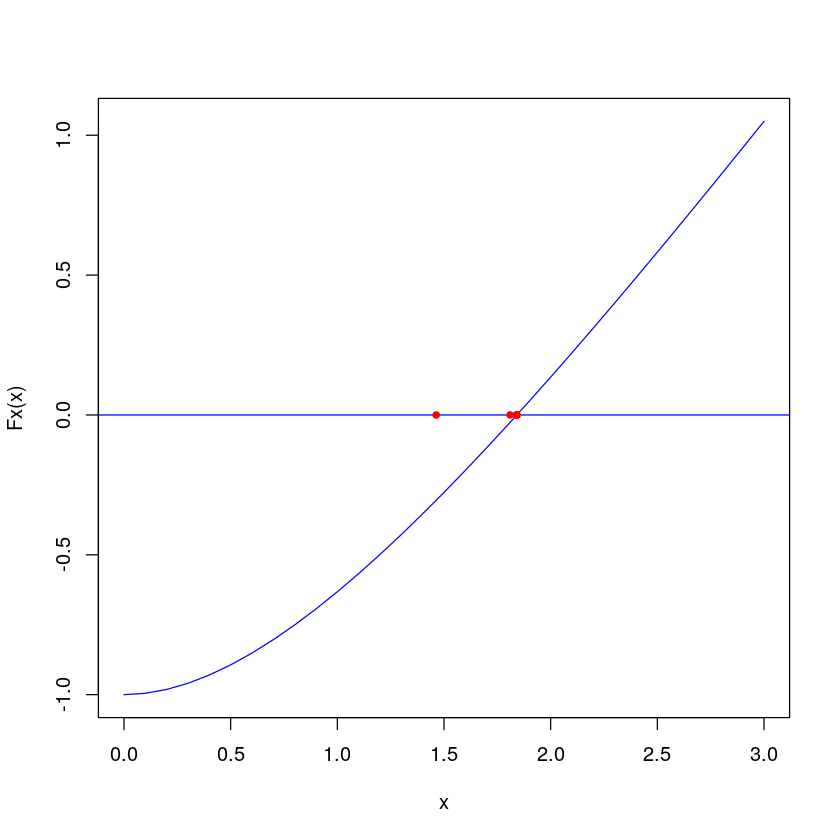

In [19]:
Fx <- function(x) exp(-x) + x -2
regula(0,3,Fx)

X= -0.4 	 
X= -0.4604317 	 
X= -0.471126 	 
X= -0.473045 	 
X= -0.4733901 	 
X= -0.4734522 	 
X= -0.4734634 	 
X= -0.4734654 	 
X= -0.4734657 	 
X= -0.4734658 	 
# iteraciones: 11

[1] -0.4734658

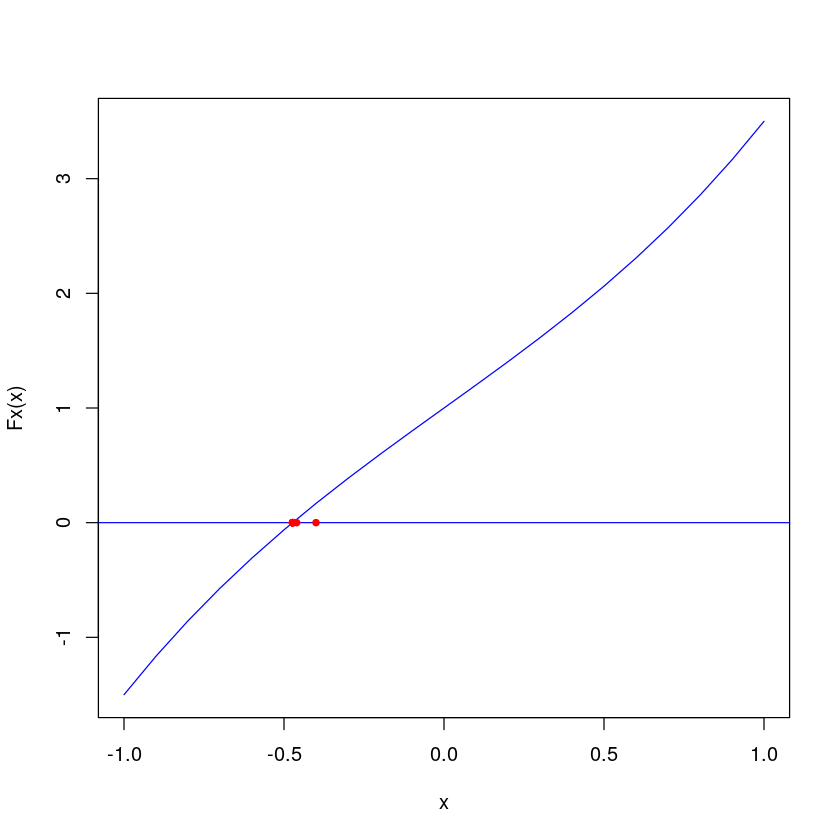

In [38]:
Fx <- function(x) 0.5*x^3 + 2*x+1
regula(-1,1,Fx)

## Newton Multivariado

In [25]:
library("rootSolve")


model <- function(x) c(F1 = x[1]^2+ x[2]^2 -1, 
                       F2 = x[1]^2- x[2]^2 +0.5)

ss <- multiroot(f = model, start = c(1, 1))
ss

$root
[1] 0.5000000 0.8660254

$f.root
          F1           F2 
2.323138e-08 2.323308e-08 

$iter
[1] 5

$estim.precis
[1] 2.323223e-08

In [24]:
model <- function(x) c(F1 = x[1] + x[2] + x[3]^2 - 12,
                       F2 = x[1]^2 - x[2] + x[3] - 2,
                       F3 = 2 * x[1] - x[2]^2 + x[3] - 1 )

# first solution
(ss <- multiroot(model, c(1, 1, 1), useFortran = FALSE))
(ss <- multiroot(f = model, start = c(1, 1, 1)))

$root
[1] 1 2 3

$f.root
           F1            F2            F3 
 3.087877e-10  4.794444e-09 -8.678146e-09 

$iter
[1] 6

$estim.precis
[1] 4.593792e-09

$root
[1] 1 2 3

$f.root
           F1            F2            F3 
 3.087877e-10  4.794444e-09 -8.678146e-09 

$iter
[1] 6

$estim.precis
[1] 4.593792e-09

__Encontrar la raíz del siguiente sistema:__
$$
%\left[
\begin{array}{cc}
f_1(x_1,x_2,x_3)=&x_1+ x_2 + x_3^2 -5\\
f_2(x_1,x_2,x_3)=&x_1^2 - x_2 + x_3 - 10\\
f_3(x_1,x_2,x_3)=&2x_1 - x_2^2 +x_3 - 1
\end{array}
%\right]
$$